# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
#merged_data_df.head()
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
total_mice = len(merged_data_df["Mouse ID"].unique())
print(f"Number of mice: {total_mice}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = merged_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

#duplicated_mice

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, "Mouse ID"].unique()

duplicated_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data_duplicated_mice_ID = merged_data_df.loc[merged_data_df["Mouse ID"] == 'g989',:]
data_duplicated_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data_df = merged_data_df[merged_data_df["Mouse ID"] != "g989"]
clean_mice_data = clean_mice_data_df.drop_duplicates(subset=["Mouse ID"])
clean_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
check_mice_nom = len(clean_mice_data["Mouse ID"].unique())
print(f"Number of mice in clean DataFaram: {check_mice_nom}")

Number of mice in clean DataFaram: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
gp_drug_regimen = clean_mice_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_mean = gp_drug_regimen["Tumor Volume (mm3)"].mean()

tumor_median = gp_drug_regimen["Tumor Volume (mm3)"].median()

tumor_var = gp_drug_regimen["Tumor Volume (mm3)"].var()

tumor_stdev = gp_drug_regimen["Tumor Volume (mm3)"].std()

tumor_SEM = gp_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM]).T
summary.columns = ["Tumor Volume Mean",
                   "Tumor Volume Median",
                   "Tumor Volume Variance",
                   "Tumor Volume Std.Dev.",
                   "Tumor Volume SEM."]
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume SEM.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary =  clean_mice_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_summary

Tumor Volume (mm3)                      
                           mean median  var  std  sem
Drug Regimen                                         
Capomulin                  45.0   45.0  0.0  0.0  0.0
Ceftamin                   45.0   45.0  0.0  0.0  0.0
Infubinol                  45.0   45.0  0.0  0.0  0.0
Ketapril                   45.0   45.0  0.0  0.0  0.0
Naftisol                   45.0   45.0  0.0  0.0  0.0
Placebo                    45.0   45.0  0.0  0.0  0.0
Propriva                   45.0   45.0  0.0  0.0  0.0
Ramicane                   45.0   45.0  0.0  0.0  0.0
Stelasyn                   45.0   45.0  0.0  0.0  0.0
Zoniferol                  45.0   45.0  0.0  0.0  0.0

## Bar and Pie Charts

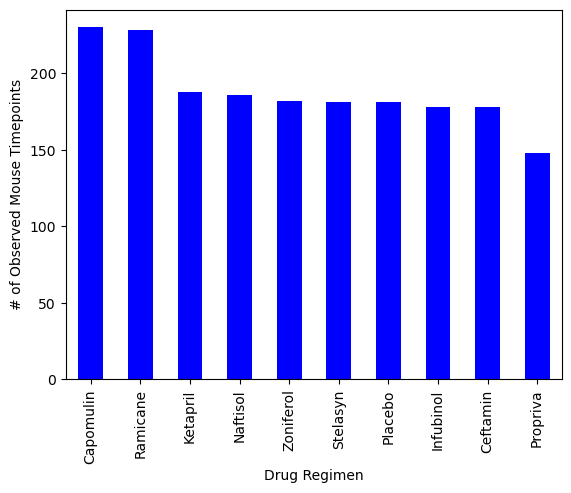

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

##Get columns needed from clean mmice data
timepoint = clean_mice_data_df[["Drug Regimen","Timepoint"]]

##Get drug regiment count
drugs_per_time = timepoint["Drug Regimen"].value_counts()

##Create bar chart
drugs_per_time.plot(kind="bar",color = "blue",
                    xlabel="Drug Regimen",
                    ylabel="# of Observed Mouse Timepoints")

plt.show()

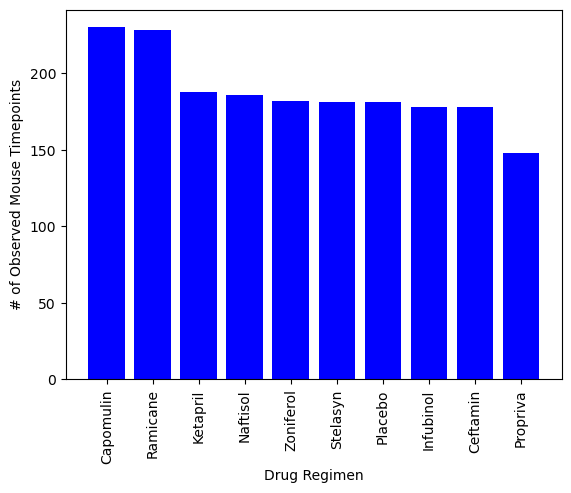

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = drugs_per_time.index.values
time = drugs_per_time.values

##Create bar chart
plt.bar(drugs, time, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

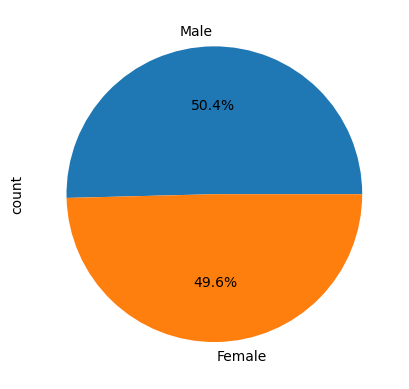

In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_data = clean_mice_data["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

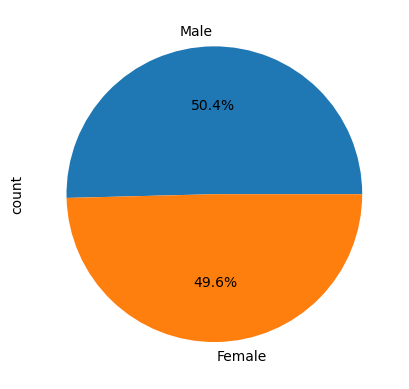

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mice_data_df.loc[clean_mice_data_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_mice_data_df.loc[clean_mice_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mice_data_df.loc[clean_mice_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mice_data_df.loc[clean_mice_data_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_mice_data_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tp = max_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tp.merge(clean_mice_data_df,on=["Mouse ID","Timepoint"],how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_list.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print('---------------------------------------------------------------------') 


Capomulin Regimen
The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
---------------------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
---------------------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
---------------------------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors is: 64.29983003
The interquartile range of Ceftamin tumors is: 15.577752179999997
---------------------

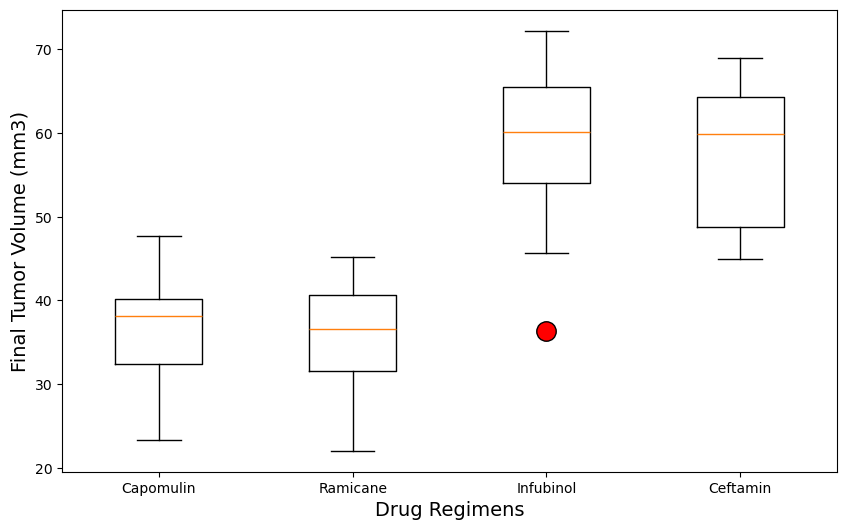

In [45]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=14)
ax1.set_xlabel('Drug Regimens', fontsize=14)
ax1.boxplot(tumor_vol_list, flierprops = dict(markerfacecolor='red', marker='o', markersize='14'))
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

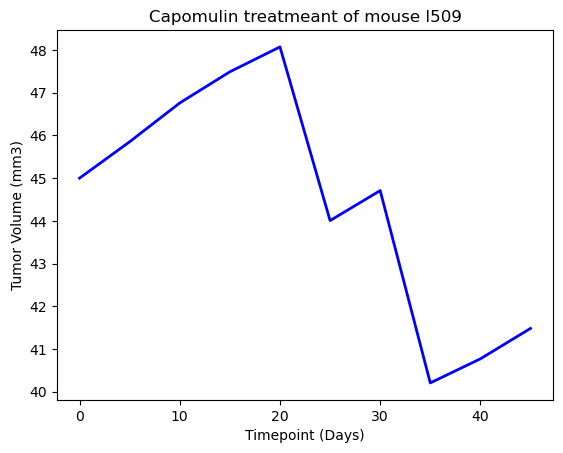

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

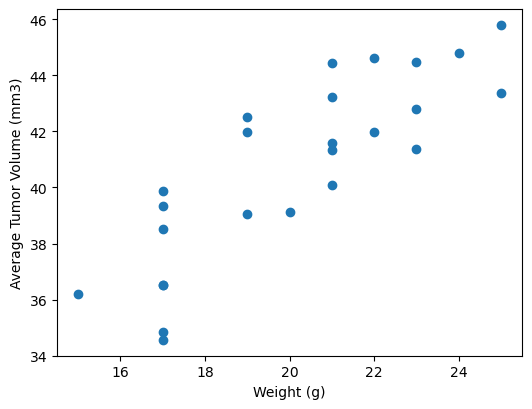

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol = avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

merged_data = pd.merge(avg_tumor_vol, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

fig, ax = plt.subplots(figsize=(6, 4.5))
ax.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


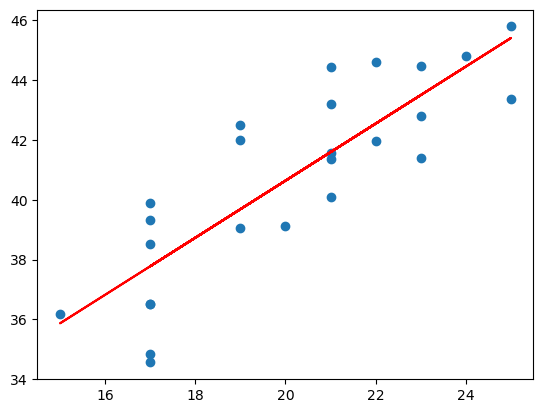

In [130]:
# Calculate the correlation coefficient and a linear regression model
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}')

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = merged_data['Weight (g)']
y_values = merged_data['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

plt.show()